In [1]:
!unzip '/content/disaster.zip'

Archive:  /content/disaster.zip
   creating: Dataset Collection/Test_set/
   creating: Dataset Collection/Test_set/Cyclone/
  inflating: Dataset Collection/Test_set/Cyclone/190.jpg  
  inflating: Dataset Collection/Test_set/Cyclone/191.jpg  
  inflating: Dataset Collection/Test_set/Cyclone/192.jpg  
  inflating: Dataset Collection/Test_set/Cyclone/193.jpg  
  inflating: Dataset Collection/Test_set/Cyclone/194.jpg  
  inflating: Dataset Collection/Test_set/Cyclone/195.jpg  
  inflating: Dataset Collection/Test_set/Cyclone/196.jpg  
  inflating: Dataset Collection/Test_set/Cyclone/197.jpg  
  inflating: Dataset Collection/Test_set/Cyclone/198.jpg  
  inflating: Dataset Collection/Test_set/Cyclone/199.jpg  
   creating: Dataset Collection/Test_set/Earthquake/
  inflating: Dataset Collection/Test_set/Earthquake/181.jpg  
  inflating: Dataset Collection/Test_set/Earthquake/182.jpg  
  inflating: Dataset Collection/Test_set/Earthquake/183.jpg  
  inflating: Dataset Collection/Test_set/Earthq

In [2]:
#Import ImageDatageneratorLibrary
from keras.preprocessing.image import ImageDataGenerator

In [3]:
import numpy as np #numerical analysis 
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from keras.callbacks import ReduceLROnPlateau

#Dense layer is regularly deeply connected neural network layer
#MaxPooling2D to downsample the image
from keras.layers import Conv2D, Dropout, Dense, Flatten, MaxPooling2D, SeparableConv2D, Activation, BatchNormalization
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

In [4]:
#configure ImageDatGenerator Class 
#Define the parameters/arguments for ImageDataGenerator class

train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 rotation_range=180,
                                 zoom_range=0.2,
                                 width_shift_range=0.2,
                                height_shift_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [13]:
#Applying ImageDataGenerator functionality to train data 

x_train =train_datagen.flow_from_directory('/content/Dataset Collection/Train_set',
                                           target_size = (64,64),
                                           batch_size=5,
                                           color_mode='rgb',
                                           class_mode='categorical')

Found 51 images belonging to 5 classes.


In [14]:
#Applying ImageDataGenerator functionality to test data 

x_test =test_datagen.flow_from_directory('/content/Dataset Collection/Test_set',
                                         target_size = (64,64), 
                                         batch_size=5,color_mode='rgb',
                                         class_mode='categorical')

Found 51 images belonging to 5 classes.


In [15]:
#initializing the model
model=Sequential()

#add convolutional, maxpooling and flatten layers
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

#add Dense Layer 
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=4,activation='softmax'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [17]:
#configure the learning process
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
x_test.class_indices

{'Cyclone': 0, 'Earthquake': 1, 'Flood': 2, 'Storms': 3, 'Wildfire': 4}

In [ ]:
#Training the model
model.fit_generator(generator=x_train,steps_per_epoch=len(x_train),epochs=1,validation_data=x_test,validation_steps=len(x_test))

Epoch 1/1

169/169 [==============================] - 270s 2s/step - loss: 1.2815 - accuracy: 0.3706 - val_loss: 1.1783 - val_accuracy: 0.4040


In [22]:
#save the model
model.save('disaster.h5')
model_json = model.to_json()
with open("model-bw.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
#load the saved model
model = load_model("disaster.h5")

In [24]:
#load image

img=load_img(r"/content/Dataset Collection/Test_set/Earthquake/183.jpg",target_size=(64,64))
x=img_to_array(img)
x=np.expand_dims(x,axis=0)
index=['Cyclone','Earthquake','Flood','Wildfire']

#predict class 

y=np.argmax(model.predict(x),axis=1)
print(index[int(y)])

1/1 [==============================] - 60s 60s/step
Wildfire


In [ ]:
#load image
img=load_img(r"/content/Dataset Collection/Flood/171.jpg",target_size=(64,64))
x=img_to_array(img)
x=np.expand_dims(x,axis=0)
index=['Cyclone','Earthquake','Flood','Wildfire']

#predict class 
y=np.argmax(model.predict(x),axis=1)
print(index[int(y)])


1/1 [==============================] - 0s 19ms/step
Cyclone


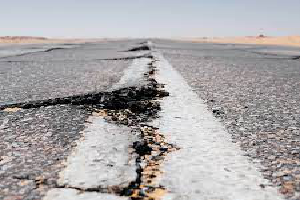

In [ ]:
from tensorflow.keras.preprocessing import image
img=image.load_img('/content/dataset/Earthquake/181.jpg', target_size=(200,300))
img